<a href="https://colab.research.google.com/github/MarshalSebasteen/Resume-Screening/blob/main/Another_copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q scikit-learn pandas nltk
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample.csv to sample (1).csv


In [ ]:
df = pd.read_csv("UpdatedResumeDataSet.csv")  # Replace with your file name if different
df = df[['Resume', 'Category']]
df.dropna(inplace=True)

In [ ]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)     # Remove non-alphabetic characters
    text = text.lower().split()                # Convert to lowercase and tokenize
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    return ' '.join(text)

df['Cleaned_Resume'] = df['Resume'].apply(clean_text)

In [ ]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['Cleaned_Resume'])
y = df['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.metrics import classification_report

# Example true labels
y_test = [0, 1, 1, 0, 1]

# Example predicted labels
y_pred = [0, 0, 1, 0, 1]

report = classification_report(y_test, y_pred, zero_division=0)
print("\nClassification Report:\n")
print(report)



Classification Report:

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

X_test shape: (193, 3000)
y_test shape: (5,)
y_pred shape: (193,)
Accuracy: 1.0

Classification Report (as table):


,precision,recall,f1-score,support
Advocate,1.0,1.0,1.0,3.0
Arts,1.0,1.0,1.0,6.0
Automation Testing,1.0,1.0,1.0,5.0
Blockchain,1.0,1.0,1.0,7.0
Business Analyst,1.0,1.0,1.0,4.0
Civil Engineer,1.0,1.0,1.0,9.0
Data Science,1.0,1.0,1.0,5.0
Database,1.0,1.0,1.0,8.0
DevOps Engineer,1.0,1.0,1.0,14.0
DotNet Developer,1.0,1.0,1.0,5.0


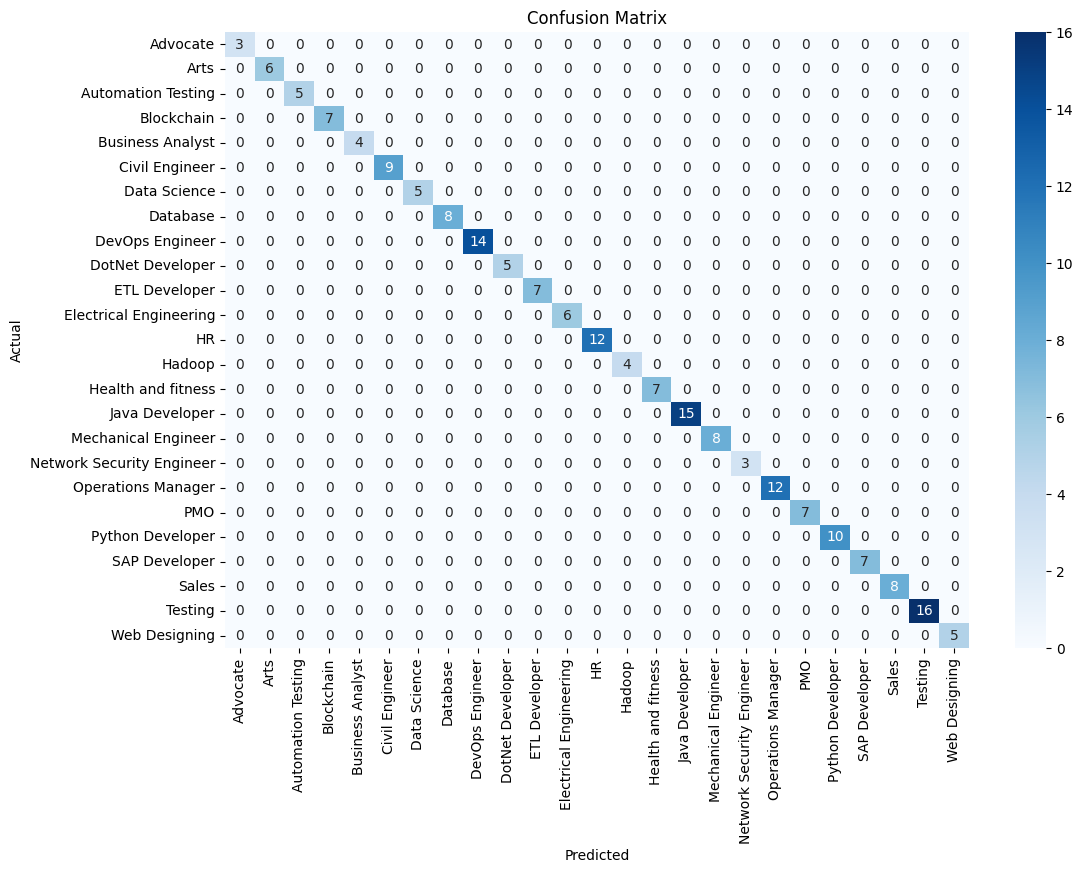

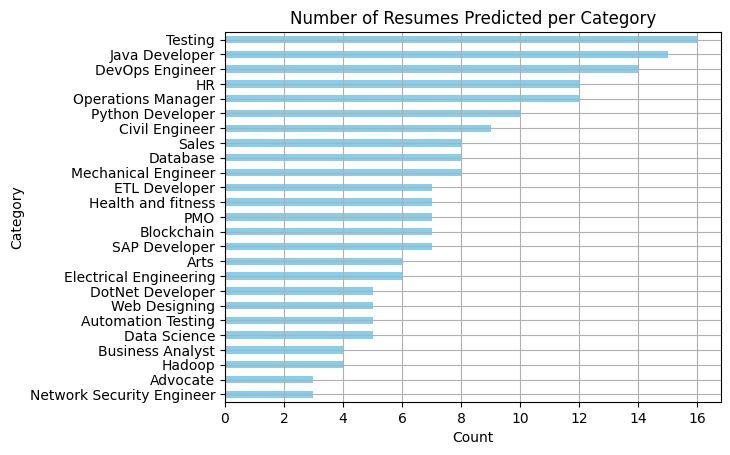

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming X_test and y_test are your test data features and labels
# Example: Uncomment and replace these lines with your actual data loading code
# X_test = ...  # numpy array or DataFrame of shape (num_samples, num_features)
# y_test = ...  # list or array of shape (num_samples,)

# Predict labels for the test set
y_pred = model.predict(X_test)

# Check shapes to confirm they match
print("X_test shape:", X_test.shape)
print("y_test shape:", np.array(y_test).shape)
print("y_pred shape:", np.array(y_pred).shape)

# Now evaluate accuracy
from sklearn.model_selection import train_test_split

# X and y are your full dataset features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then train your model on X_train, y_train
# After training, predict on X_test
y_pred = model.predict(X_test)

# Now you can calculate accuracy:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))


# Generate classification report and convert to DataFrame
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
df_report = pd.DataFrame(report).transpose().round(2)
print("\nClassification Report (as table):")
display(df_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Bar chart of predictions distribution
pd.Series(y_pred).value_counts().sort_values(ascending=True).plot(
    kind='barh', color='skyblue', title='Number of Resumes Predicted per Category')
plt.xlabel("Count")
plt.ylabel("Category")
plt.grid(True)
plt.show()



In [ ]:
feature_names = tfidf.get_feature_names_out()
for i, class_label in enumerate(model.classes_):
    top_words = np.argsort(model.coef_[i])[-10:]
    print(f"\nTop words for {class_label}:")
    print(", ".join([feature_names[j] for j in top_words]))


Top words for Advocate:
mumbai, chennai, tax, university, criminal, courts, court, legal, law, advocate

Top words for Arts:
professor, workshop, drawing, teacher, total, days, championship, painting, karate, arts

Top words for Automation Testing:
excellent, qtp, good, manual, box, selenium, tester, test, testing, automation

Top words for Blockchain:
apex, parson, vanet, contracts, iit, virtual, technology, smart, ethereum, blockchain

Top words for Business Analyst:
mumbai, excel, maintain, functional, test, requirement, report, business, cash, analyst

Top words for Civil Engineer:
villa, material, subcontractors, autocad, project, al, construction, engineer, site, civil

Top words for Data Science:
months, deep, analytics, python, year, science, machine, less, learning, data

Top words for Database:
log, administrator, sql, rman, backup, installation, databases, server, oracle, database

Top words for DevOps Engineer:
aws, mysql, scripts, nendrasys, cloud, project, build, servers

In [ ]:
def predict_resume_category(resume_text):
    cleaned = clean_text(resume_text)
    vector = tfidf.transform([cleaned])
    probabilities = model.predict_proba(vector)[0]  # array of probabilities
    top_idx = probabilities.argmax()
    top_category = model.classes_[top_idx]
    confidence = probabilities[top_idx] * 100

    print(f"\nPredicted Category: {top_category}")
    print(f"Confidence: {confidence:.2f}%")

    # Show top 3 predictions
    top_3 = sorted(zip(model.classes_, probabilities), key=lambda x: x[1], reverse=True)[:3]
    print("\nTop 3 Predictions:")
    for label, prob in top_3:
        print(f"{label}: {prob*100:.2f}%")

    return top_category

In [ ]:
import joblib
joblib.dump(model, "resume_model.pkl")
joblib.dump(tfidf, "resume_tfidf.pkl")

['resume_tfidf.pkl']

In [ ]:
sample_resume = str(input("Enter the field:"))
predicted_category = predict_resume_category(sample_resume)
print(f"Predicted Category: {predicted_category}")


Enter the field:sql

Predicted Category: Database
Confidence: 9.83%

Top 3 Predictions:
Database: 9.83%
ETL Developer: 8.22%
DevOps Engineer: 7.32%
Predicted Category: Database
